# <font color='red'>PROYECTO FINAL MODELOS UAM</font>

In [ ]:
from PIL import Image
import random
import cv2
from skimage.io import imread
from skimage.io import imsave
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [12]:
def marcarPixel(color, bitporinsertar):
    if (color%2)==1:
        if bitporinsertar==0:
            color=color-1
    elif (color%2)==0:
        if bitporinsertar==1:
            color=color+1
    return color

In [13]:
def plotLsbRgb(img):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set_title('Imagen RGB')
    ax1.imshow(img)
    ax2.set_title('LSB RGB')
    img=255*(img%2)
    ax2.imshow(img)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10,
                        right=0.95, hspace=0.3,wspace=0.35)

In [14]:
#funcion que pasa de decimal a binario
def binarizar(decimal):
    binario = ''
    while decimal // 2 != 0:
        binario = str(decimal % 2) + binario
        decimal = decimal // 2
    return str(decimal) + binario

# <font color='blue'>MENSAJE A OCULTAR</font>

In [15]:
x=input('ingrese el mensaje a ocultar: ');
men=''
for i in range(len(x)):
    z=binarizar(ord(x[i]))
    while len(z)<8:
        z='0'+z
    men=z+men
print('el tamaño del mensaje es: ',len(men), 'bits')
print(men)

ingrese el mensaje a ocultar: juan jose salgado
el tamaño del mensaje es:  136 bits
0110111101100100011000010110011101101100011000010111001100100000011001010111001101101111011010100010000001101110011000010111010101101010


# <font color='blue'>Codificación del mensaje en la foto</font>

In [16]:
img=imread("C:/Users/Juanita/Desktop/proyectoFinal/logo.jpg")
img2=img
pos=7
cont=0
ban=0
height, width, channels = img.shape
for x in range(0,height):
    if ban==1:
        break
    for y in range(0,width):
        z=binarizar(img[x,y,0])
        while len(z)<8:
            z='0'+z
        z=z[0:7]+men[cont]    
        img2[x,y,0] = int(str(z), 2)
        cont=cont+1
        if cont==len(men):
            ban=1
            break
imsave('Stego.bmp', img2)

In [17]:
img=imread('C:/Users/Juanita/Desktop/proyectoFinal/logo.jpg')
img2=imread('Stego.bmp')

Porciento de la imagen marcada: 100%
bits incrustados: 480000
Bytes incrustados: 60000.0
KiloBytes incrustados: 58.59375
MegaBytes incrustados: 0.057220458984375


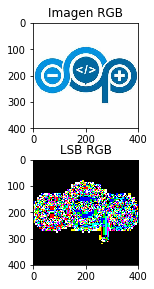

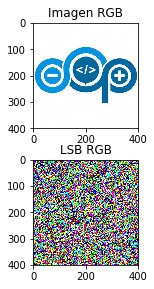

In [18]:
imgOriginal = np.array(img2)
nFilas, nCols, nCanales = imgOriginal.shape
key=41196
random.seed(key)
porcentajeDeimagenPorMarcar=100
sizeMarca = nCols*int(porcentajeDeimagenPorMarcar*(nFilas/100))
plotLsbRgb(imgOriginal)

imgMarcada = imgOriginal.copy();
cont = 1 #contador del numero de bits inscrustados

#Proceso de incrustacion
for fila in range(0,nFilas):
    for columna in range(0,nCols):
        pixel=imgOriginal[fila,columna]
        newPixel = [marcarPixel(
            pixel[0],random.randint(0,1)),
            marcarPixel(pixel[1],random.randint(0,1)),
            marcarPixel(pixel[2],random.randint(0,1))]
        imgMarcada[fila,columna] = newPixel
        if cont >= sizeMarca:
            break
        cont = cont +1
    if cont >= sizeMarca:
        break        

plotLsbRgb(imgMarcada)
image = Image.fromarray(imgMarcada, 'RGB')
image.save('ImagenMarcada.bmp')
print('Porciento de la imagen marcada: ' + str(porcentajeDeimagenPorMarcar)+'%')
print('bits incrustados: ' + str(sizeMarca*3))
print('Bytes incrustados: ' + str(sizeMarca*3/8))
print('KiloBytes incrustados: ' + str(sizeMarca*3/8/1024))
print('MegaBytes incrustados: ' + str(sizeMarca*3/8/1024/1024))


# <font color='blue'>Decodificación del mensaje en la foto</font>

In [19]:
img=img2
height, width, channels = img.shape
cont=0
ban=0
men2=''
for x in range(0,height):
    if ban==1:
        break
    for y in range(0,width):
        z=binarizar(img[x,y,0])
        while len(z)<8:
            z='0'+z
        men2=men2+z[7]
        cont=cont+1
        if cont==len(men):
            ban=1
            break

In [20]:
i=0
res=''
while i<len(men2):
    part=men2[i:i+8]
    res=(chr(int(str(part), 2)))+res
    i=i+8 
print(res)

juan jose salgado
